In [133]:
%matplotlib inline

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
plt.style.use = "default"

pd.__version__

'0.22.0'

In [134]:
train = pd.read_csv("data/TrainData1.txt", sep='\t')
labels = pd.read_csv("data/TrainLabel1.txt", sep='\t')

In [135]:
new_label_map = {}
for i, col in enumerate(train.columns):
    new_label_map[col] = "f{}".format(i)

train = train.rename(columns=new_label_map)

labels = labels.rename(columns={"1": "label"})
merged = labels.merge(train, left_index=True,right_index=True)

In [136]:
merged.shape

(149, 3313)

In [137]:
merged.describe()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f3302,f3303,f3304,f3305,f3306,f3307,f3308,f3309,f3310,f3311
count,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,...,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000,149.000
mean,1.604,13422818791946309457778495933816971564560215186...,67114093959731547288892479669084857822801075932...,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,20134228187919464186667743900725457346840322779...,13422818791946309457778495933816971564560215186...,3.504,13422818791946309457778495933816971564560215186...,13422818791946309457778495933816971564560215186...,...,26845637583892618915556991867633943129120430373...,67114093959731547288892479669084857822801075932...,1.250,40268456375838928373335487801450914693680645559...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,67114093959731547288892479669084857822801075932...,26845637583892618915556991867633943129120430373...,33557046979865773644446239834542428911400537966...,13422818791946309457778495933816971564560215186...
std,1.096,11546481745700334532041446684281935174181082516...,81923192051904040180026773983385323642459353772...,11546481745700336049751518735632771830010697222...,11546481745700337567461590786983608485840311928...,14093311897214878950381315815876273286336264059...,11546481745700337567461590786983608485840311928...,0.129,11546481745700337567461590786983608485840311928...,11546481745700337567461590786983608485840311928...,...,16217727724465409339482838726591314131025785517...,81923192051904040180026773983385323642459353772...,0.341,19725119911506460485109985481592386033114246749...,81923192051904040180026773983385323642459353772...,81923192051904055357127494496893690200755500830...,81923192051904040180026773983385323642459353772...,16217727724465412374902982829292987442685014929...,18069338605547722241511982604358942422451091585...,11546481745700336049751518735632771830010697222...
min,1.000,3.719,1.000,1.000,1.795,2.705,2.895,3.032,2.988,3.241,...,1.000,1.000,1.000,1.859,2.571,1.338,2.273,1.000,1.627,1.195
25%,1.000,3.821,1.621,1.702,2.291,3.262,3.253,3.430,3.446,3.551,...,1.414,1.574,1.000,2.103,2.966,1.768,2.501,1.000,2.323,1.945
50%,1.000,3.855,1.966,1.895,2.447,3.369,3.378,3.528,3.500,3.617,...,1.803,1.723,1.000,2.153,3.081,1.882,2.586,1.723,2.545,2.094
75%,2.000,3.894,2.177,2.097,2.619,3.466,3.478,3.579,3.564,3.661,...,2.042,1.865,1.457,2.243,3.215,2.024,2.636,2.063,2.690,2.225
max,5.000,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,3.736,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,2.652,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...,10000000000000000887529745682247582063159023622...


In [138]:
merged.head(10)

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f3302,f3303,f3304,f3305,f3306,f3307,f3308,f3309,f3310,f3311
0,1,3.904,2.310,2.153,10000000000000000887529745682247582063159023622...,3.532,3.525,3.678,3.637,3.697,...,1.952,1.442,1.000,2.128,2.980,1.961,2.519,2.054,2.690,2.091
1,2,3.751,1.161,1.017,2.348,3.382,3.393,3.509,3.512,3.622,...,1.000,1.584,1.000,1.945,3.257,1.965,2.536,1.449,2.605,1.369
2,1,3.809,1.912,1.857,2.499,3.289,3.371,3.542,10000000000000000887529745682247582063159023622...,3.473,...,1.870,1.482,1.000,2.155,3.270,1.928,2.618,2.154,2.530,2.186
3,1,3.894,2.094,1.881,2.786,3.344,3.274,3.486,3.517,3.642,...,1.481,1.511,1.000,2.094,3.247,1.825,2.562,1.942,2.599,1.765
4,2,3.841,1.204,1.015,2.290,3.109,3.066,3.411,3.488,3.641,...,1.000,1.717,1.000,2.136,3.021,2.054,2.602,1.000,2.542,2.090
5,4,3.904,1.000,1.702,2.049,3.430,3.444,3.630,3.448,3.543,...,10000000000000000887529745682247582063159023622...,1.673,1.000,2.321,2.814,1.831,2.752,1.000,1.797,2.131
6,1,3.879,1.068,1.555,1.873,3.256,3.225,3.414,3.511,3.631,...,1.977,1.592,1.000,1.984,2.876,1.361,2.588,2.151,2.360,1.863
7,1,3.898,1.542,1.566,2.291,10000000000000000887529745682247582063159023622...,3.487,3.660,3.380,3.512,...,1.996,1.792,1.832,2.229,2.858,2.050,2.584,2.359,2.234,2.094
8,1,3.861,2.333,2.299,2.627,3.400,3.367,3.525,3.597,3.686,...,1.617,1.768,1.082,2.042,3.166,2.073,2.505,2.014,2.917,2.080
9,4,3.921,2.052,2.069,2.452,3.333,3.314,3.493,3.221,3.241,...,2.152,2.090,1.739,10000000000000000887529745682247582063159023622...,2.619,2.192,2.779,1.000,2.071,2.332


# Data Cleaning

#### Todos:
+ figure out how many and which rows for each column have these huge numbers
+ figure out a way to map the values to ones that fit more with the data 
    * make them "average joes"

In [139]:
fr = train.iloc[0,:] # first row
poten_errors = fr[fr > fr.mean()]
poten_errors.describe()

count                                               69.000
mean    10000000000000002101697803323328251387822715387...
std     12230631806435245486489244355180364340614809249...
min     10000000000000000887529745682247582063159023622...
25%     10000000000000000887529745682247582063159023622...
50%     10000000000000000887529745682247582063159023622...
75%     10000000000000000887529745682247582063159023622...
max     10000000000000000887529745682247582063159023622...
Name: 0, dtype: float64

In [140]:
fr[~(fr > fr.mean())].describe()

count   3243.000
mean       2.167
std        0.553
min        1.000
25%        1.884
50%        2.194
75%        2.482
max        3.904
Name: 0, dtype: float64

We have 69 rows with vastly diffrent values. We can't just drop the rows or columns because the signal to noise ratio for both axis is really low. Lets find out more about these errors.

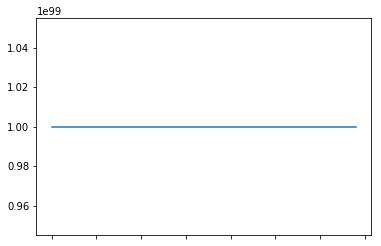

In [141]:
poten_errors.plot.line()

It seems like all the error numbers are the same even though the standard deviation, mean, and max are different numbers. Let's verify that the numbers are actually the same.

In [142]:
mMax = poten_errors.max()
all_diffs = [mMax - i for i in poten_errors]
extreme_diffs = poten_errors.max() - poten_errors.min()

print("Max - Min\n", extreme_diffs, "\nMax - All\n", all_diffs)

Max - Min
 0.0 
Max - All
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Since all the errors are indeed the same number, lets replace all of them with the mean of the particular column that they're in for now. We can think of a better way to replace those values later.